## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc, f1_score, precision_score
import seaborn as sn
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from pandas.plotting import table

## Importing Datasets

In [2]:
# D1 - Guidelines for Evaluating Liquefaction Resistance Using Shear Wave Velocity Measurement and Simplified Procedures
# Dataset VERIFIED
andruss99 = pd.read_excel("Datasets/D1 - Andrus 1999 Dataset.xlsx")

# D2 - Gravelly soils that liquefied during 2008 Wenchuan, China earthquake, M s =8.0
# Dataset VERIFIED
wenchuan2008 = pd.read_excel("Datasets/D2 - Wenchuan 2008 Dataset.xlsx")

# D3 - Shear-Wave Velocity–Based Probabilistic and Deterministic Assessment of Seismic Soil Liquefaction Potential
# Dataset VERIFIED
supplemental_data = pd.read_excel("Datasets/D3 - SupplementalData Dataset.xlsx")


# D4 - Datasets for liquefaction case studies of gravelly soils during the 2008 Wenchuan earthquake
# Dataset VERIFIED
zhou2020 = pd.read_excel("Datasets/D4 - Zhou2020 Dataset.xlsx")

# D5 - Predicting liquefaction probability based on shear wave velocity an update
# Dataset VERIFIED
mengfenshen2016 = pd.read_excel("Datasets/D5 - MengfenShen 2016.xlsx")

# D6 - Ground behavior and liquefaction analyses in central Taiwan-Wufeng
# Dataset VERIFIED
chu2004 = pd.read_excel("Datasets/D6 - Chu2004.xlsx")

# D7 - Datasets for gravelly soil liquefaction case histories
# Dataset VERIFIED
JiLeiHu = pd.read_excel("Datasets/D7 - JiLei Hu.xlsx", nrows = 234)

## Data Preprocessing

In [3]:
print("D1 - Andrus 1999 Total Datapoints:", len(andruss99))
print("D2 - Wenchuan 2008 Total Datapoints:", len(wenchuan2008))
print("D3 - SupplemntalData Total Datapoints:", len(supplemental_data))
print("D4 - Zhou2020 Total Datapoints:", len(zhou2020))
print("D5 - MengfenShen2016 Total Datapoints:", len(mengfenshen2016))
print("D6 - Chu2004 Total Datapoints:", len(chu2004))
print("D7 - JiLei Hu Total Datapoints:", len(JiLeiHu))

D1 - Andrus 1999 Total Datapoints: 225
D2 - Wenchuan 2008 Total Datapoints: 47
D3 - SupplemntalData Total Datapoints: 415
D4 - Zhou2020 Total Datapoints: 88
D5 - MengfenShen2016 Total Datapoints: 45
D6 - Chu2004 Total Datapoints: 15
D7 - JiLei Hu Total Datapoints: 234


## D1 - Andrus 1999 DATASET

In [4]:
andruss99[["Vs1 (m/s)","CSR","Liq"]].sample(5)

,Vs1 (m/s),CSR,Liq
133,142,0.18,1
36,148,0.13,0
203,170,0.40,1
89,191,0.28,0
140,176,0.22,1


In [5]:
andruss99[["Vs1 (m/s)","CSR","Liq"]].isna().sum()

Vs1 (m/s)    0
CSR          0
Liq          0
dtype: int64

In [6]:
andruss99['Liq'].value_counts()

0    129
1     96
Name: Liq, dtype: int64

In [7]:
andruss99.rename(columns = {'Vs1 (m/s)':'Vs1'}, inplace = True)

In [8]:
andruss99[["Vs1","CSR","Liq"]].describe()

,Vs1,CSR,Liq
count,225.000000,225.000000,225.000000
mean,161.848889,0.204800,0.426667
std,31.008701,0.127178,0.495696
min,99.000000,0.020000,0.000000
25%,145.000000,0.110000,0.000000
50%,159.000000,0.180000,0.000000
75%,179.000000,0.280000,1.000000
max,318.000000,0.600000,1.000000


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

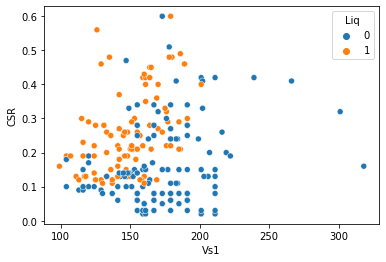

In [9]:
sn.scatterplot(x = andruss99['Vs1'], y = andruss99['CSR'], hue = andruss99['Liq'])

## D2 - Wenchuan 2008

In [10]:
wenchuan2008.head(5)

,Int.,PGA (g),CSR,ds (m),dw (m),of (kpa),Vs (m/s),Vs1 (m/s),Vscri (m/s),Liq
0,8,0.34,0.30,6.0,2.8,82,238,250,193,1
1,8,0.34,0.33,3.0,1.0,37,133,171,143,1
2,7,0.22,0.22,5.2,1.4,61,161,182,135,1
3,8,0.37,0.29,4.6,3.0,71,159,173,163,1
4,8,0.24,0.27,4.6,0.8,49,185,221,180,1


In [11]:
wenchuan2008.isnull().sum()

Int.           0
PGA (g)        0
CSR            0
ds (m)         0
dw (m)         0
of (kpa)       0
Vs (m/s)       0
Vs1 (m/s)      0
Vscri (m/s)    0
Liq            0
dtype: int64

In [12]:
wenchuan2008.rename(columns = {'Vs1 (m/s)':'Vs1', 'Vs (m/s)':'Vs'}, inplace = True)

In [13]:
# Computing CSR7.5
MW = 7.9
MSF = (MW/7.5) ** (-2.56)
wenchuan2008['CSR7.5'] = wenchuan2008['CSR'] / MSF

In [14]:
wenchuan2008.sample(5)

,Int.,PGA (g),CSR,ds (m),dw (m),of (kpa),Vs,Vs1,Vscri (m/s),Liq,CSR7.5
6,7,0.18,0.16,5.1,2.2,68,164,181,129,1,0.182763
32,9,0.48,0.50,10.2,2.0,112,234,228,372,0,0.571135
38,8,0.41,0.45,10.2,1.4,106,337,332,260,0,0.514021
45,9,0.47,0.35,6.3,4.3,100,365,365,273,0,0.399794
29,8,0.49,0.41,4.7,2.4,66,215,238,171,1,0.468330


In [15]:
wenchuan2008['Liq'].value_counts()

1    30
0    17
Name: Liq, dtype: int64

In [16]:
wenchuan2008[["Vs1","CSR","Liq"]].describe()

,Vs1,CSR,Liq
count,47.000000,47.000000,47.000000
mean,229.191489,0.269574,0.638298
std,45.678288,0.099847,0.485688
min,160.000000,0.100000,0.000000
25%,196.000000,0.195000,0.000000
50%,232.000000,0.270000,1.000000
75%,250.500000,0.325000,1.000000
max,365.000000,0.500000,1.000000


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

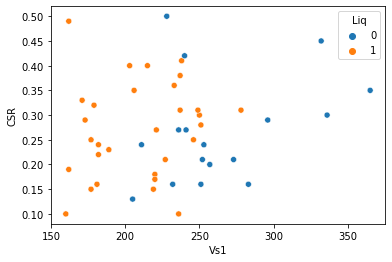

In [17]:
sn.scatterplot(x = wenchuan2008.Vs1, y = wenchuan2008.CSR, hue = wenchuan2008.Liq)

In [18]:
wenchuan2008.corr()['Liq'].abs().sort_values()

CSR7.5      0.010206
CSR         0.010206
PGA (g)     0.058265
Int.        0.126244
dw (m)      0.580556
Vs1         0.582781
ds (m)      0.717589
of (kpa)    0.730292
Vs          0.745473
Liq         1.000000
Name: Liq, dtype: float64

## D3 - Supplemental Data

In [19]:
supplemental_data.sample(5)

,Mw,Liquefied?,Crit. Depth,Depth to,s' vo,s ' vo,amax (g),rd,CSR,VS1
170,7.0,0,3.0,7.0,78.49,52.98,0.26,0.80,0.20,153.1
308,7.0,1,4.0,10.0,127.25,63.49,0.50,0.76,0.50,175.1
397,7.8,0,3.0,10.0,115.75,61.80,0.09,0.62,0.05,109.9
313,7.0,1,3.5,7.0,83.63,61.56,0.60,0.73,0.39,140.2
266,7.0,1,7.5,13.0,183.33,96.51,0.55,0.55,0.37,158.8


In [20]:
supplemental_data.rename(columns = {'VS1':'Vs1', 'Liquefied?':'Liq'}, inplace = True)

In [21]:
# Computing CSR7.5
MSF = (supplemental_data['Mw']/7.5) ** (-2.56)
supplemental_data['CSR7.5'] = supplemental_data['CSR'] / MSF

In [22]:
supplemental_data['Liq'].value_counts()

1    287
0    128
Name: Liq, dtype: int64

In [23]:
supplemental_data.isnull().sum()

Mw             0
Liq            0
Crit. Depth    0
Depth to       0
s' vo          0
s ' vo         0
amax (g)       0
rd             0
CSR            0
Vs1            0
CSR7.5         0
dtype: int64

In [24]:
supplemental_data[["Vs1", "CSR", "Liq"]].describe()

,Vs1,CSR,Liq
count,415.000000,415.000000,415.000000
mean,166.696386,0.282578,0.691566
std,40.201615,0.149448,0.462404
min,81.700000,0.020000,0.000000
25%,140.900000,0.160000,0.000000
50%,159.800000,0.260000,1.000000
75%,184.850000,0.400000,1.000000
max,362.900000,0.730000,1.000000


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

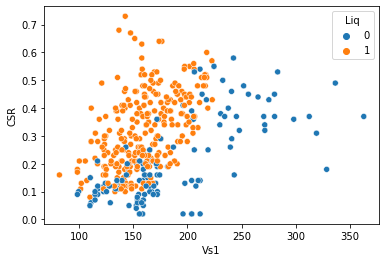

In [25]:
sn.scatterplot(x = supplemental_data.Vs1, y = supplemental_data.CSR, hue = supplemental_data.Liq)

In [26]:
supplemental_data.corr()['Liq'].abs().sort_values()

s ' vo         0.017980
Crit. Depth    0.025008
Depth to       0.047524
s' vo          0.062056
rd             0.141075
Mw             0.276172
Vs1            0.290327
CSR7.5         0.325049
CSR            0.329960
amax (g)       0.333705
Liq            1.000000
Name: Liq, dtype: float64

## D4 - Zhou 2020

In [27]:
zhou2020.sample(5)

,Case No.,Site location,Borehole name,Site coordinates（latitude and longitude coordinates）,Liquefied?,"Ground water table, GWT (m)",Critical depth range (m),Soil classification,Permeability coefficient (cm/s),"Gravel content, GC (%)",...,"Mean cyclic stress ratio, CSR",Square of cofficient of variance of CSR,Standard deviation of CSR,CSRMw=7.5,Standard deviation of CSRMw=7.5,Measurements of shear wave velocity,Vs1 (m/s),Standard deviation of Vs1 (m/s),Data class,Field testing data
9,10,Jiangyou thermal power plant,Site3,"(31.799°N,104.763°E)",0,3.2,3.20 ~ 5.00,sandy gravel,0.058,56.0,...,0.264104,0.088504,0.078570,0.293775,0.087397,SASW,303.155556,10.782817,B,2008.12
55,56,Chengdu Shenxianshu,NaN,"(30.606°N,104.037°E)",0,4.9,5.50 ~ 6.80,sand,0.023,5.0,...,0.119420,0.131618,0.043325,0.132837,0.048192,Downhole,189.000000,9.450000,C,2010.01
72,73,Mianyang Jinqiaoyinzuo,ZK21,"(31.465°N,104.732°E)",0,3.0,3.00 ~ 4.40,gravelly sand,-,44.0,...,0.232710,0.093690,0.071230,0.258854,0.079232,Downhole,281.585714,8.268171,B,2007.10
28,29,Xudu Element School,NaN,"(30.852°N,103.672°E)",0,2.2,2.20 ~ 2.80,sandy gravel,0.023,50.0,...,0.283102,0.073604,0.076806,0.314908,0.085435,SASW,245.700000,4.914000,B,2008.10
29,30,Yanjiang Element School,NaN,"(30.795°N,103.707°E)",0,2.5,2.50 ~ 4.50,sandy gravel,0.035,60.0,...,0.299629,0.093941,0.091836,0.333292,0.102153,SASW,369.100000,29.528000,B,2008.09


In [28]:
zhou2020.rename(columns = {'Mean cyclic stress ratio, CSR':'CSR' ,'Vs1 (m/s)':'Vs1', 'Liquefied?':'Liq'}, inplace = True)
zhou2020['Liq'] = pd.get_dummies(zhou2020['Liq'], drop_first = True)

In [29]:
zhou2020.isna().sum()

Case No.                                                                 0
Site location                                                            0
Borehole name                                                           50
Site coordinates（latitude and longitude coordinates）                     0
Liq                                                                      0
Ground water table, GWT (m)                                              0
Critical depth range (m)                                                 0
Soil classification                                                      0
Permeability coefficient (cm/s)                                          0
Gravel content, GC (%)                                                   0
Thickness of crust layer, H1         (m)                                 0
Mean unit weight of crust layer, γ1 (kN/m3)                              0
Thickness of critical layer, H2 (m)                                      0
Mean unit weight of layer

In [30]:
zhou2020.sample(5)

,Case No.,Site location,Borehole name,Site coordinates（latitude and longitude coordinates）,Liq,"Ground water table, GWT (m)",Critical depth range (m),Soil classification,Permeability coefficient (cm/s),"Gravel content, GC (%)",...,CSR,Square of cofficient of variance of CSR,Standard deviation of CSR,CSRMw=7.5,Standard deviation of CSRMw=7.5,Measurements of shear wave velocity,Vs1,Standard deviation of Vs1 (m/s),Data class,Field testing data
13,14,Mianyang fengtai,ZK12,"(31.501°N,104.767°E)",1,3.0,3.00 ~ 5.90,sand,-,0.0,...,0.175458,0.130876,0.063475,0.195170,0.070606,SASW,178.9,10.150,B,2008.11
43,44,Mianyang Fanhua Plaza,NaN,"(31.468°N,104.676°E)",0,5.9,5.90 ~ 6.80,sandy gravel,0.053,52.0,...,0.214464,0.103141,0.068876,0.238558,0.076614,Downhole,250.4,5.008,B,2013.11
73,74,Mianyang Lingjiangdijing,ZK3,"(31.456°N,104.685°E)",0,1.5,2.00 ~ 3.00,sand,-,5.0,...,0.273542,0.094596,0.084132,0.304274,0.093584,Downhole,207.2,4.144,B,2006.08
80,81,Yanting Zijiangxincheng,ZK63,"(31.209°N,105.387°E)",0,5.0,5.00 ~ 6.30,sand,-,5.0,...,0.074606,0.213030,0.034435,0.082988,0.038303,Downhole,208.7,10.435,C,2008.06
64,65,Wenchuan Miansi,NaN,"(31.360°N,103.497°E)",0,4.7,4.70 ~ 6.50,sandy gravel,0.035,80.0,...,0.476813,0.066872,0.123302,0.530382,0.137155,Downhole,418.9,20.945,B,2010.06


In [31]:
zhou2020[["Vs1","CSR","Liq"]].describe()

,Vs1,CSR,Liq
count,88.000000,88.000000,88.000000
mean,256.631209,0.285318,0.181818
std,57.049237,0.210092,0.387905
min,167.800000,0.072260,0.000000
25%,213.191628,0.157074,0.000000
50%,249.069988,0.225837,0.000000
75%,283.664286,0.314583,0.000000
max,441.700000,1.248907,1.000000


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

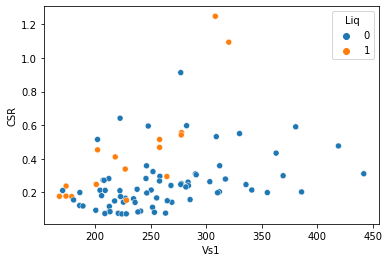

In [32]:
sn.scatterplot(x = zhou2020.Vs1, y = zhou2020.CSR, hue = zhou2020.Liq)

In [33]:
zhou2020['Liq'].value_counts()

0    72
1    16
Name: Liq, dtype: int64

## D5 - MengfenShen2016 DATASET

In [34]:
mengfenshen2016.sample(5)

,GWT,dm,du,ov,o'v,qc,fs,vs,FC,Ic,Vs1cs,amax,CSR7.5,Liq
29,1.5,4.0,3.5,73.3,49.3,5.55,0.028,125,20,1.83,152,0.18,0.109,1
1,2.4,5.5,2.5,100.6,70.7,6.59,0.030,155,5,1.81,169,0.44,0.250,1
39,0.9,3.7,3.0,69.4,41.9,5.35,0.021,127,5*,1.76,157,0.25,0.164,1
9,2.4,3.5,3.0,63.4,52.6,6.14,0.037,138,28*,1.85,167,0.44,0.214,1
42,1.1,3.2,1.1,59.5,39.0,4.93,0.022,136,1,1.80,172,0.25,0.154,1


In [35]:
mengfenshen2016.Liq.value_counts()

1    45
Name: Liq, dtype: int64

In [36]:
# Computing CSR
MW = 6.3
MSF = (MW/7.5) ** (-2.56)
mengfenshen2016['CSR'] = mengfenshen2016['CSR7.5'] * MSF

In [37]:
# Computing Vs1
mengfenshen2016['Vs1'] = mengfenshen2016['vs'] * ( ( 100 / mengfenshen2016["o'v"] ) ** 0.25)

In [38]:
mengfenshen2016.sample(5)

,GWT,dm,du,ov,o'v,qc,fs,vs,FC,Ic,Vs1cs,amax,CSR7.5,Liq,CSR,Vs1
36,2.7,4.8,2.7,86.8,66.7,5.19,0.019,125,5*,1.85,138,0.34,0.177,1,0.276578,138.317953
42,1.1,3.2,1.1,59.5,39.0,4.93,0.022,136,1,1.80,172,0.25,0.154,1,0.240639,172.096785
41,1.5,3.6,2.7,65.6,45.5,5.64,0.028,130,26*,1.81,162,0.25,0.144,1,0.225013,158.285271
40,1.6,3.9,3.0,71.2,49.2,6.80,0.017,115,4,1.61,137,0.25,0.144,1,0.225013,137.311390
8,2.0,5.2,4.4,96.4,65.1,7.41,0.036,154,3,1.76,171,0.45,0.267,1,0.417212,171.445257


In [39]:
mengfenshen2016[["Vs1", "CSR", "Liq"]].describe()

,Vs1,CSR,Liq
count,45.000000,45.000000,45.0
mean,162.200004,0.370021,1.0
std,22.485079,0.116671,0.0
min,134.717561,0.150009,1.0
25%,145.802202,0.307830,1.0
50%,158.285271,0.390647,1.0
75%,169.035080,0.435963,1.0
max,228.581408,0.584409,1.0


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

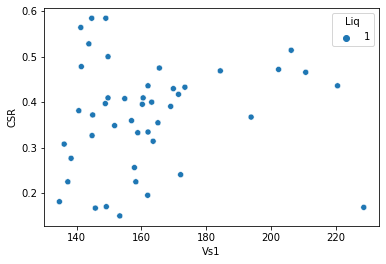

In [40]:
sn.scatterplot(x = mengfenshen2016['Vs1'], y = mengfenshen2016['CSR'], hue = mengfenshen2016["Liq"])


## D6 - CHU 2004 DATASET

In [41]:
chu2004.sample(5)

,Seismic CPT sounding,Liq,Vs (m/s),Vs1,CSR,CSReq
6,CPT-10,0,130,142,0.22,0.18
0,CPT-7,1,167,183,0.46,0.47
4,CPT-16,0,158,184,0.54,0.56
10,CPT-7,1,184,181,0.26,0.27
9,CPT-3,1,176,168,0.24,0.25


In [42]:
chu2004.Liq.value_counts()

1    9
0    6
Name: Liq, dtype: int64

In [43]:
chu2004[["Vs1","CSR","Liq"]].describe()

,Vs1,CSR,Liq
count,15.000000,15.000000,15.000000
mean,162.400000,0.362667,0.600000
std,21.927804,0.174907,0.507093
min,129.000000,0.150000,0.000000
25%,145.500000,0.240000,0.000000
50%,151.000000,0.260000,1.000000
75%,183.000000,0.500000,1.000000
max,200.000000,0.670000,1.000000


<AxesSubplot:xlabel='Vs1', ylabel='CSR'>

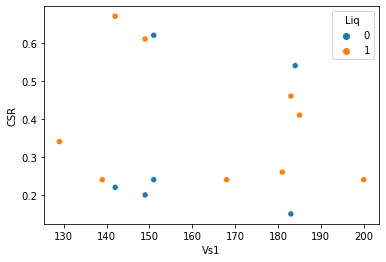

In [44]:
sn.scatterplot(x = chu2004['Vs1'], y = chu2004['CSR'], hue = chu2004["Liq"])


## D7 - JiLeiHu DATASET

In [45]:
JiLeiHu.sample(5)

,Case No.,Date,Earthquake Name,Site location & Borehole name,Mw,R (km),t (s),PGA,FC (%),GC (%),...,Dw (m),Ds (m),Hn (m),Dn (m),MSF,rd,CSR,CSR7.5,Liqefied ？,Reference
169,170,2011.03.11,Tohoku earthquake,"Kanagawa-ken, KA001",9.0,456.384,26.5,0.092,0,73a,...,0.33,8.75,1,0,0.627041,1.005335,0.114057,0.181897,No,"Hu et al., 2016; Kayen, et al., 2012"
33,34,2008.05.12,Wenchuan earthquake,"Bayi village, Mianzhu",7.9,78,105,0.430,～5,50,...,6.20,6.70,4.1,2.1,0.886252,0.957433,0.278350,0.314076,No,"Cao, 2010; Yuan et al., 2018; Chen et al., 2018"
116,117,1995.01.17,Hyogoken-Nambu earthquake,Nishinomiya Expressway 17,6.9,34,16.3a,0.530,8,50,...,2.00,3.30,*,*,1.213828,0.968745,0.414782,0.341714,No,"Andrus et al.,1999; Chang, 2016; Kayen et al.,..."
50,51,2008.05.12,Wenchuan earthquake,"Quanshui village, Dujiangyan, CD-03",7.9,25.7,70,0.240,4.5,4.8a,...,0.90,1.70,1,0,0.886252,0.996501,0.206236,0.232706,Yes,"Cao, 2010; Yuan et al., 2018; Chen et al., 2018"
215,216,2016.04.16,Muisne earthquake,Manta DPT-1 & Vs-4,7.8,140,34.2a,0.460,*,*,...,3.80,5.20,2.7,1.1,0.912882,0.967748,0.330667,0.362224,Yes,"Cao et al., 2019; Lopez et al., 2018"


In [46]:
JiLeiHu.rename( columns = {"Vs1 (m/s)":"Vs1", "Liqefied ？": "Liq"}, inplace = True )

In [47]:
JiLeiHu['Liq'] = pd.get_dummies(JiLeiHu['Liq'], drop_first = True)

In [48]:
JiLeiHu['Liq'].value_counts()

1    136
0     98
Name: Liq, dtype: int64

In [49]:
JiLeiHu[["Vs1","CSR","Liq"]].describe()

,Vs1,CSR,Liq
count,234.000000,234.000000,234.000000
mean,216.842041,0.309895,0.581197
std,53.294244,0.138284,0.494421
min,102.617025,0.093468,0.000000
25%,178.264999,0.196080,0.000000
50%,211.618119,0.287311,1.000000
75%,250.278668,0.412705,1.000000
max,423.709739,0.796367,1.000000


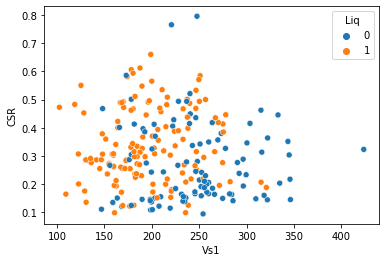

In [50]:
sn.scatterplot(x = JiLeiHu['Vs1'], y = JiLeiHu['CSR'], hue = JiLeiHu["Liq"])
plt.savefig("JiLeiHu-dataset-scatterplot.pdf")

## FINAL DATASET CONCATENATION

In [51]:
#SELECTED COLUMNS
selected_columns = [ andruss99[['Vs1', 'CSR', 'Liq']], 
                     wenchuan2008[['Vs1', 'CSR', 'Liq']], 
                     supplemental_data[['Vs1','CSR', 'Liq']],
                     zhou2020[['Vs1','CSR','Liq']],
                     mengfenshen2016[['Vs1','CSR','Liq']],
                     chu2004[['Vs1','CSR','Liq']],
                     JiLeiHu[['Vs1','CSR','Liq']]
]

final_df = pd.concat(selected_columns, ignore_index = True)

In [52]:
final_df

,Vs1,CSR,Liq
0,153.000000,0.300000,1
1,177.000000,0.290000,1
2,185.000000,0.290000,1
3,191.000000,0.300000,1
4,163.000000,0.240000,0
...,...,...,...
1064,168.544426,0.489081,1
1065,233.115851,0.467307,1
1066,231.448473,0.163622,0
1067,233.396471,0.155112,0


In [53]:
final_df.describe()

,Vs1,CSR,Liq
count,1069.000000,1069.000000,1069.000000
mean,186.554335,0.276646,0.579046
std,53.203060,0.151762,0.493943
min,81.700000,0.020000,0.000000
25%,149.709784,0.155112,0.000000
50%,173.000000,0.250000,1.000000
75%,212.500000,0.380000,1.000000
max,441.700000,1.248907,1.000000


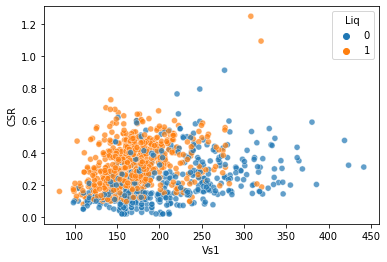

In [54]:
sn.scatterplot(x = final_df.Vs1, y = final_df.CSR, hue = final_df.Liq, alpha = 0.7)
plt.savefig("final-dataset-scatterplot.pdf")

In [55]:
final_df.Liq.value_counts()

1    619
0    450
Name: Liq, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

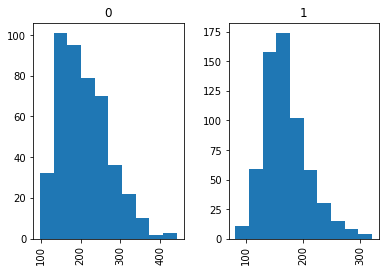

In [56]:
final_df.Vs1.hist(final_df.Liq)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

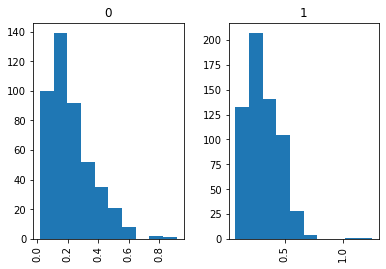

In [57]:
final_df.CSR.hist(final_df.Liq)

## Building The ANN Model

In [58]:
def MinMaxNormalization(data):
    # MinMax Normalization
    scaler = MinMaxScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    minmax_normalized = scaler.transform(data)
    return minmax_normalized

In [59]:
# Standardization --> mean value to 0 and std to 1
def Standardization(data):
    layer = preprocessing.Normalization()
    layer.adapt(data)
    std_normalized = layer(data)
    print("Features mean: %.2f" % (std_normalized.numpy().mean()))
    print("Features std: %.2f" % (std_normalized.numpy().std()))
    return std_normalized

In [60]:
features = final_df[['Vs1', 'CSR']]
target = final_df['Liq'].astype(np.float32)

In [61]:
data = MinMaxNormalization(final_df[['Vs1', 'CSR']])

In [62]:
normalized_features = pd.DataFrame(data = data, columns = features.columns)

In [63]:
normalized_features.describe()

,Vs1,CSR
count,1069.000000,1069.000000
mean,0.291262,0.208841
std,0.147786,0.123494
min,0.000000,0.000000
25%,0.188916,0.109944
50%,0.253611,0.187158
75%,0.363333,0.292943
max,1.000000,1.000000


In [64]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size = 0.3)

In [65]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 3, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Epoch 1/1000
17/17 [==============================] - 1s 26ms/step - loss: 0.7429 - accuracy: 0.3346 - val_loss: 0.7445 - val_accuracy: 0.3156
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.7364 - accuracy: 0.3748 - val_loss: 0.7392 - val_accuracy: 0.3511
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7309 - accuracy: 0.4589 - val_loss: 0.7342 - val_accuracy: 0.4133
Epoch 4/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.7265 - accuracy: 0.4990 - val_loss: 0.7300 - val_accuracy: 0.4800
Epoch 5/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.7224 - accuracy: 0.5315 - val_loss: 0.7266 - val_accuracy: 0.4978
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.7193 - accuracy: 0.5488 - val_loss: 0.7236 - val_accuracy: 0.5156
Epoch 7/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.7168 - accuracy: 0.5526 - val_loss: 0.7211 - val_accuracy: 0.5333
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5793 - val_loss: 0.6850 - val_accuracy: 0.5556
Epoch 59/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5793 - val_loss: 0.6847 - val_accuracy: 0.5556
Epoch 60/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5793 - val_loss: 0.6843 - val_accuracy: 0.5556
Epoch 61/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5793 - val_loss: 0.6838 - val_accuracy: 0.5556
Epoch 62/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5793 - val_loss: 0.6834 - val_accuracy: 0.5556
Epoch 63/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5793 - val_loss: 0.6830 - val_accuracy: 0.5556
Epoch 64/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5793 - val_loss: 0.6827 - val_accuracy: 0.5556
Epoch 65/1000

17/17 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.5793 - val_loss: 0.6611 - val_accuracy: 0.5556
Epoch 116/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5793 - val_loss: 0.6608 - val_accuracy: 0.5556
Epoch 117/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.5793 - val_loss: 0.6602 - val_accuracy: 0.5556
Epoch 118/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.5793 - val_loss: 0.6598 - val_accuracy: 0.5556
Epoch 119/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5793 - val_loss: 0.6592 - val_accuracy: 0.5556
Epoch 120/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.5793 - val_loss: 0.6588 - val_accuracy: 0.5556
Epoch 121/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.5793 - val_loss: 0.6583 - val_accuracy: 0.5556
Epoch 1

Epoch 172/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6788 - val_loss: 0.6334 - val_accuracy: 0.6489
Epoch 173/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.6864 - val_loss: 0.6328 - val_accuracy: 0.6489
Epoch 174/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6845 - val_loss: 0.6326 - val_accuracy: 0.6489
Epoch 175/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6883 - val_loss: 0.6319 - val_accuracy: 0.6533
Epoch 176/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.6864 - val_loss: 0.6317 - val_accuracy: 0.6489
Epoch 177/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6883 - val_loss: 0.6311 - val_accuracy: 0.6533
Epoch 178/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6922 - val_loss: 0.6305 - val_accuracy:

Epoch 229/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.7228 - val_loss: 0.6096 - val_accuracy: 0.6844
Epoch 230/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7208 - val_loss: 0.6095 - val_accuracy: 0.6844
Epoch 231/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.7228 - val_loss: 0.6089 - val_accuracy: 0.6844
Epoch 232/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7208 - val_loss: 0.6087 - val_accuracy: 0.6844
Epoch 233/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7247 - val_loss: 0.6081 - val_accuracy: 0.6844
Epoch 234/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.7247 - val_loss: 0.6078 - val_accuracy: 0.6844
Epoch 235/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.7247 - val_loss: 0.6075 - val_accuracy:

Epoch 286/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5958 - accuracy: 0.7419 - val_loss: 0.5917 - val_accuracy: 0.7244
Epoch 287/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.7438 - val_loss: 0.5916 - val_accuracy: 0.7244
Epoch 288/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.7419 - val_loss: 0.5914 - val_accuracy: 0.7244
Epoch 289/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.7400 - val_loss: 0.5912 - val_accuracy: 0.7244
Epoch 290/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.7419 - val_loss: 0.5905 - val_accuracy: 0.7289
Epoch 291/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.7438 - val_loss: 0.5907 - val_accuracy: 0.7244
Epoch 292/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.7419 - val_loss: 0.5904 - val_accuracy:

Epoch 343/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7514 - val_loss: 0.5787 - val_accuracy: 0.7244
Epoch 344/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.7533 - val_loss: 0.5785 - val_accuracy: 0.7244
Epoch 345/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7533 - val_loss: 0.5783 - val_accuracy: 0.7244
Epoch 346/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7553 - val_loss: 0.5776 - val_accuracy: 0.7378
Epoch 347/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7533 - val_loss: 0.5776 - val_accuracy: 0.7378
Epoch 348/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7553 - val_loss: 0.5775 - val_accuracy: 0.7378
Epoch 349/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7514 - val_loss: 0.5775 - val_accuracy:

Epoch 400/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7553 - val_loss: 0.5689 - val_accuracy: 0.7467
Epoch 401/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7572 - val_loss: 0.5690 - val_accuracy: 0.7467
Epoch 402/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7572 - val_loss: 0.5686 - val_accuracy: 0.7467
Epoch 403/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5767 - accuracy: 0.7610 - val_loss: 0.5681 - val_accuracy: 0.7467
Epoch 404/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7591 - val_loss: 0.5684 - val_accuracy: 0.7467
Epoch 405/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7610 - val_loss: 0.5680 - val_accuracy: 0.7467
Epoch 406/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7610 - val_loss: 0.5679 - val_accuracy:

Epoch 457/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7610 - val_loss: 0.5623 - val_accuracy: 0.7467
Epoch 458/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7610 - val_loss: 0.5621 - val_accuracy: 0.7467
Epoch 459/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7610 - val_loss: 0.5620 - val_accuracy: 0.7467
Epoch 460/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7610 - val_loss: 0.5619 - val_accuracy: 0.7467
Epoch 461/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7610 - val_loss: 0.5617 - val_accuracy: 0.7467
Epoch 462/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7610 - val_loss: 0.5614 - val_accuracy: 0.7467
Epoch 463/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7610 - val_loss: 0.5613 - val_accuracy:

Epoch 514/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7610 - val_loss: 0.5561 - val_accuracy: 0.7511
Epoch 515/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7610 - val_loss: 0.5564 - val_accuracy: 0.7511
Epoch 516/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7610 - val_loss: 0.5563 - val_accuracy: 0.7511
Epoch 517/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7610 - val_loss: 0.5561 - val_accuracy: 0.7511
Epoch 518/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7591 - val_loss: 0.5563 - val_accuracy: 0.7511
Epoch 519/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7591 - val_loss: 0.5557 - val_accuracy: 0.7511
Epoch 520/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7610 - val_loss: 0.5555 - val_accuracy:

Epoch 571/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.7610 - val_loss: 0.5525 - val_accuracy: 0.7467
Epoch 572/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7610 - val_loss: 0.5519 - val_accuracy: 0.7422
Epoch 573/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7610 - val_loss: 0.5514 - val_accuracy: 0.7511
Epoch 574/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.7591 - val_loss: 0.5514 - val_accuracy: 0.7511
Epoch 575/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.7610 - val_loss: 0.5521 - val_accuracy: 0.7511
Epoch 576/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7591 - val_loss: 0.5518 - val_accuracy: 0.7467
Epoch 577/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7591 - val_loss: 0.5514 - val_accuracy:

Epoch 628/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.7610 - val_loss: 0.5484 - val_accuracy: 0.7511
Epoch 629/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7629 - val_loss: 0.5484 - val_accuracy: 0.7511
Epoch 630/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7610 - val_loss: 0.5483 - val_accuracy: 0.7511
Epoch 631/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.7610 - val_loss: 0.5487 - val_accuracy: 0.7422
Epoch 632/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.7591 - val_loss: 0.5484 - val_accuracy: 0.7422
Epoch 633/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7591 - val_loss: 0.5485 - val_accuracy: 0.7422
Epoch 634/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7591 - val_loss: 0.5486 - val_accuracy:

Epoch 685/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7591 - val_loss: 0.5458 - val_accuracy: 0.7467
Epoch 686/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7610 - val_loss: 0.5461 - val_accuracy: 0.7422
Epoch 687/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7591 - val_loss: 0.5459 - val_accuracy: 0.7422
Epoch 688/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.7629 - val_loss: 0.5453 - val_accuracy: 0.7511
Epoch 689/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7572 - val_loss: 0.5452 - val_accuracy: 0.7511
Epoch 690/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7591 - val_loss: 0.5452 - val_accuracy: 0.7511
Epoch 691/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7610 - val_loss: 0.5457 - val_accuracy:

Epoch 742/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7572 - val_loss: 0.5433 - val_accuracy: 0.7511
Epoch 743/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7610 - val_loss: 0.5436 - val_accuracy: 0.7467
Epoch 744/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7610 - val_loss: 0.5435 - val_accuracy: 0.7511
Epoch 745/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7610 - val_loss: 0.5436 - val_accuracy: 0.7467
Epoch 746/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5560 - accuracy: 0.7591 - val_loss: 0.5436 - val_accuracy: 0.7467
Epoch 747/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7610 - val_loss: 0.5435 - val_accuracy: 0.7467
Epoch 748/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7591 - val_loss: 0.5431 - val_accuracy:

Epoch 799/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7533 - val_loss: 0.5410 - val_accuracy: 0.7556
Epoch 800/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7629 - val_loss: 0.5407 - val_accuracy: 0.7511
Epoch 801/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7629 - val_loss: 0.5406 - val_accuracy: 0.7511
Epoch 802/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7591 - val_loss: 0.5412 - val_accuracy: 0.7511
Epoch 803/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7610 - val_loss: 0.5413 - val_accuracy: 0.7511
Epoch 804/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7591 - val_loss: 0.5411 - val_accuracy: 0.7511
Epoch 805/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7591 - val_loss: 0.5410 - val_accuracy:

Epoch 856/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7591 - val_loss: 0.5394 - val_accuracy: 0.7511
Epoch 857/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5531 - accuracy: 0.7591 - val_loss: 0.5393 - val_accuracy: 0.7511
Epoch 858/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7553 - val_loss: 0.5392 - val_accuracy: 0.7556
Epoch 859/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7591 - val_loss: 0.5389 - val_accuracy: 0.7556
Epoch 860/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7572 - val_loss: 0.5390 - val_accuracy: 0.7556
Epoch 861/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5529 - accuracy: 0.7591 - val_loss: 0.5389 - val_accuracy: 0.7556
Epoch 862/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7610 - val_loss: 0.5387 - val_accuracy:

Epoch 913/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7591 - val_loss: 0.5378 - val_accuracy: 0.7556
Epoch 914/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7591 - val_loss: 0.5378 - val_accuracy: 0.7556
Epoch 915/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7572 - val_loss: 0.5377 - val_accuracy: 0.7556
Epoch 916/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7591 - val_loss: 0.5381 - val_accuracy: 0.7511
Epoch 917/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7629 - val_loss: 0.5381 - val_accuracy: 0.7511
Epoch 918/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7591 - val_loss: 0.5377 - val_accuracy: 0.7556
Epoch 919/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7572 - val_loss: 0.5379 - val_accuracy:

Epoch 970/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7629 - val_loss: 0.5368 - val_accuracy: 0.7511
Epoch 971/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7629 - val_loss: 0.5372 - val_accuracy: 0.7467
Epoch 972/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7610 - val_loss: 0.5362 - val_accuracy: 0.7556
Epoch 973/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7610 - val_loss: 0.5363 - val_accuracy: 0.7511
Epoch 974/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.7572 - val_loss: 0.5361 - val_accuracy: 0.7556
Epoch 975/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5506 - accuracy: 0.7591 - val_loss: 0.5366 - val_accuracy: 0.7511
Epoch 976/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7591 - val_loss: 0.5362 - val_accuracy:

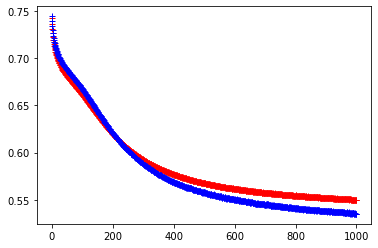

In [66]:
mdl = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.3)
plt.plot(mdl.history['loss'], 'r+', label = "Training set")
plt.plot(mdl.history['val_loss'], 'b+', label = "Validation set")

## Evaluating The ANN Model

In [67]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7944


In [68]:
y_predictions = model.predict(X_test)

In [69]:
for i in range(len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

In [70]:
y_predictions = y_predictions.astype(int)

In [71]:
accuracy_score(y_test, y_predictions)

0.794392523364486

In [72]:
recall_score(y_test, y_predictions)

0.9424083769633508

In [73]:
f1_score(y_test, y_predictions)

0.8450704225352111

In [74]:
precision_score(y_test, y_predictions)

0.7659574468085106

<AxesSubplot:>

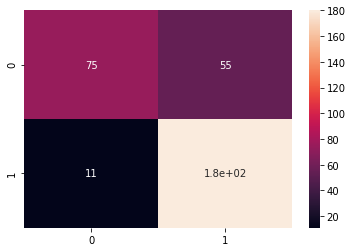

In [75]:
sn.heatmap(confusion_matrix(y_test, y_predictions), annot = True)

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.get_weights()

[array([[ 1.5541594e-34, -9.8836809e-01,  1.8301664e-34],
        [-3.1644845e-34,  9.6539676e-01,  2.2769886e-34]], dtype=float32),
 array([-0.20037645,  0.40084076, -0.030882  ], dtype=float32),
 array([[-0.9802223 ],
        [ 6.957037  ],
        [ 0.27889955]], dtype=float32),
 array([-1.7808557], dtype=float32)]

In [78]:
#Cross Validation Score

kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
recalls = []
f1_scores = []
precisions = []
for train, test in kf.split(final_df[['Vs1','CSR','Liq']]):

    train_df = final_df.loc[train]
    test_df = final_df.loc[test]
    print(len(train_df))
    print(len(test_df))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    model.fit(MinMaxNormalization(train_df[['Vs1','CSR']]), train_df['Liq'].astype(np.float32), epochs = 1000)

    y_predictions = model.predict(MinMaxNormalization(test_df[['Vs1','CSR']]))
    for i in range(len(y_predictions)):
        if y_predictions[i] < 0.5:
            y_predictions[i] = 0
        else:
            y_predictions[i] = 1

    accuracies.append(accuracy_score(test_df['Liq'].astype(np.float32), y_predictions))
    recalls.append(recall_score(test_df['Liq'].astype(np.float32), y_predictions))
    precisions.append(precision_score(test_df['Liq'].astype(np.float32), y_predictions))
    f1_scores.append(f1_score(test_df['Liq'].astype(np.float32), y_predictions))

print("Accuracies:", accuracies)
print("Recalls:", recalls)
print("F1-Scores:", f1_scores)
print("Precisions:", precisions)

855
214
Epoch 1/1000
27/27 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7719
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5320 - accuracy: 0.7673
Epoch 3/1000
27/27 [==============================] - 0s 923us/step - loss: 0.5317 - accuracy: 0.7673
Epoch 4/1000
27/27 [==============================] - 0s 887us/step - loss: 0.5320 - accuracy: 0.7696
Epoch 5/1000
27/27 [==============================] - 0s 924us/step - loss: 0.5314 - accuracy: 0.7684
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.7661
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7661
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7673
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7661
Epoch 10/1000
27/27 [==============================] - 0s 847us/step - loss: 0.5310 - 

Epoch 81/1000
27/27 [==============================] - 0s 923us/step - loss: 0.5266 - accuracy: 0.7649
Epoch 82/1000
27/27 [==============================] - 0s 923us/step - loss: 0.5269 - accuracy: 0.7673
Epoch 83/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7637
Epoch 84/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5264 - accuracy: 0.7673
Epoch 85/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7649
Epoch 86/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7673
Epoch 87/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5262 - accuracy: 0.7673
Epoch 88/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5263 - accuracy: 0.7661
Epoch 89/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5262 - accuracy: 0.7673
Epoch 90/1000
27/27 [==============================] - 0s 963us/step - loss: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7661
Epoch 162/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7661
Epoch 163/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7649
Epoch 164/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7661
Epoch 165/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7661
Epoch 166/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7661
Epoch 167/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7661
Epoch 168/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7661
Epoch 169/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7661
Epoch 170/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7661
Epoch 242/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7661
Epoch 243/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7661
Epoch 244/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7661
Epoch 245/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7649
Epoch 246/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.7661
Epoch 247/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7661
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7661
Epoch 249/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7649
Epoch 250/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7661
Epoch 322/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7661
Epoch 323/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7661
Epoch 324/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7661
Epoch 325/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7661
Epoch 326/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7661
Epoch 327/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7673
Epoch 328/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7661
Epoch 329/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7661
Epoch 330/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7649
Epoch 402/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7696
Epoch 403/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7673
Epoch 404/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7661
Epoch 405/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7661
Epoch 406/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7684
Epoch 407/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7673
Epoch 408/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7661
Epoch 409/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7661
Epoch 410/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7661
Epoch 482/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7661
Epoch 483/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7661
Epoch 484/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7661
Epoch 485/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7673
Epoch 486/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7661
Epoch 487/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7661
Epoch 488/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7673
Epoch 489/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7661
Epoch 490/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7649
Epoch 562/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7684
Epoch 563/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7696
Epoch 564/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7649
Epoch 565/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7649
Epoch 566/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7673
Epoch 567/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7673
Epoch 568/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7673
Epoch 569/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7661
Epoch 570/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7661
Epoch 642/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7661
Epoch 643/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7649
Epoch 644/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7661
Epoch 645/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7684
Epoch 646/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7649
Epoch 647/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7684
Epoch 648/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7661
Epoch 649/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7661
Epoch 650/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7708
Epoch 722/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7661
Epoch 723/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7719
Epoch 724/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7684
Epoch 725/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7684
Epoch 726/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7673
Epoch 727/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7684
Epoch 728/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7661
Epoch 729/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7673
Epoch 730/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.7684
Epoch 802/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7684
Epoch 803/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7684
Epoch 804/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7673
Epoch 805/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7684
Epoch 806/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7696
Epoch 807/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7649
Epoch 808/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7649
Epoch 809/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7673
Epoch 810/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7684
Epoch 882/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7661
Epoch 883/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7673
Epoch 884/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7661
Epoch 885/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.7649
Epoch 886/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7673
Epoch 887/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7661
Epoch 888/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7673
Epoch 889/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7696
Epoch 890/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7673
Epoch 962/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7673
Epoch 963/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7649
Epoch 964/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7673
Epoch 965/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7673
Epoch 966/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7661
Epoch 967/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7649
Epoch 968/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7661
Epoch 969/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7684
Epoch 970/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7591
Epoch 42/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7591
Epoch 43/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7602
Epoch 44/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7591
Epoch 45/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7591
Epoch 46/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7591
Epoch 47/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7567
Epoch 48/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7591
Epoch 49/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7579
Epoch 50/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7602
Epoc

27/27 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7591
Epoch 123/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7591
Epoch 124/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7591
Epoch 125/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7602
Epoch 126/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7614
Epoch 127/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7602
Epoch 128/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7591
Epoch 129/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7591
Epoch 130/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7579
Epoch 131/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7591
Epoch 203/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7602
Epoch 204/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7591
Epoch 205/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7649
Epoch 206/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7579
Epoch 207/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7579
Epoch 208/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7602
Epoch 209/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7591
Epoch 210/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7567
Epoch 211/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7614
Epoch 283/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7591
Epoch 284/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7591
Epoch 285/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7614
Epoch 286/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7591
Epoch 287/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7591
Epoch 288/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7602
Epoch 289/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7661
Epoch 290/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7602
Epoch 291/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7579
Epoch 363/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7602
Epoch 364/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7637
Epoch 365/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7591
Epoch 366/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7602
Epoch 367/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7637
Epoch 368/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7614
Epoch 369/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7614
Epoch 370/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7591
Epoch 371/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7614
Epoch 443/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7579
Epoch 444/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7579
Epoch 445/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7602
Epoch 446/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7591
Epoch 447/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7579
Epoch 448/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7649
Epoch 449/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7614
Epoch 450/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7602
Epoch 451/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7614
Epoch 523/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7614
Epoch 524/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7602
Epoch 525/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7591
Epoch 526/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7602
Epoch 527/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.7591
Epoch 528/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7567
Epoch 529/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7614
Epoch 530/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7661
Epoch 531/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7602
Epoch 603/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7591
Epoch 604/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7579
Epoch 605/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7591
Epoch 606/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7614
Epoch 607/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7614
Epoch 608/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7579
Epoch 609/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7579
Epoch 610/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7637
Epoch 611/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7626
Epoch 683/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7591
Epoch 684/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7626
Epoch 685/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7614
Epoch 686/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7579
Epoch 687/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7591
Epoch 688/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7626
Epoch 689/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7602
Epoch 690/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7614
Epoch 691/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7602
Epoch 763/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7626
Epoch 764/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7649
Epoch 765/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7602
Epoch 766/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7579
Epoch 767/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7626
Epoch 768/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7579
Epoch 769/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7614
Epoch 770/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7579
Epoch 771/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7579
Epoch 843/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7591
Epoch 844/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7591
Epoch 845/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7579
Epoch 846/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7614
Epoch 847/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7614
Epoch 848/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7602
Epoch 849/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7649
Epoch 850/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7591
Epoch 851/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7591
Epoch 923/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7626
Epoch 924/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7591
Epoch 925/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7602
Epoch 926/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7637
Epoch 927/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7591
Epoch 928/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7591
Epoch 929/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7591
Epoch 930/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7579
Epoch 931/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7649
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7637
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7649
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.7661
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7649
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7661
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7661
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7626
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7673
Epoch 11/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7637
Epoch 12/10

27/27 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7684
Epoch 84/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7637
Epoch 85/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7673
Epoch 86/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7649
Epoch 87/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7637
Epoch 88/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7661
Epoch 89/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7649
Epoch 90/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7637
Epoch 91/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7637
Epoch 92/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7649
Epoc

27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7637
Epoch 164/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7626
Epoch 165/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7661
Epoch 166/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7637
Epoch 167/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7637
Epoch 168/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7637
Epoch 169/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7661
Epoch 170/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7649
Epoch 171/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7649
Epoch 172/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7661
Epoch 244/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7637
Epoch 245/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7626
Epoch 246/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7649
Epoch 247/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7637
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7673
Epoch 249/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7661
Epoch 250/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7661
Epoch 251/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7661
Epoch 252/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7649
Epoch 324/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7637
Epoch 325/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7649
Epoch 326/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7649
Epoch 327/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7626
Epoch 328/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7637
Epoch 329/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7649
Epoch 330/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7661
Epoch 331/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7649
Epoch 332/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7673
Epoch 404/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7661
Epoch 405/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7649
Epoch 406/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7637
Epoch 407/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7661
Epoch 408/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7637
Epoch 409/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7637
Epoch 410/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7661
Epoch 411/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7661
Epoch 412/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.

27/27 [==============================] - 0s 923us/step - loss: 0.5026 - accuracy: 0.7649
Epoch 484/1000
27/27 [==============================] - 0s 885us/step - loss: 0.5024 - accuracy: 0.7661
Epoch 485/1000
27/27 [==============================] - 0s 808us/step - loss: 0.5027 - accuracy: 0.7649
Epoch 486/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5024 - accuracy: 0.7661
Epoch 487/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7661
Epoch 488/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7708
Epoch 489/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7637
Epoch 490/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7637
Epoch 491/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7649
Epoch 492/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5023 - accu

27/27 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7673
Epoch 564/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7661
Epoch 565/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7637
Epoch 566/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7649
Epoch 567/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7673
Epoch 568/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7661
Epoch 569/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7649
Epoch 570/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7649
Epoch 571/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7649
Epoch 572/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.

27/27 [==============================] - 0s 962us/step - loss: 0.5021 - accuracy: 0.7661
Epoch 644/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5020 - accuracy: 0.7649
Epoch 645/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7649
Epoch 646/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7649
Epoch 647/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7637
Epoch 648/1000
27/27 [==============================] - 0s 923us/step - loss: 0.5029 - accuracy: 0.7614
Epoch 649/1000
27/27 [==============================] - 0s 885us/step - loss: 0.5028 - accuracy: 0.7661
Epoch 650/1000
27/27 [==============================] - 0s 770us/step - loss: 0.5019 - accuracy: 0.7649
Epoch 651/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7649
Epoch 652/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5018 - ac

27/27 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7649
Epoch 723/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7637
Epoch 724/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7649
Epoch 725/1000
27/27 [==============================] - 0s 962us/step - loss: 0.5020 - accuracy: 0.7661
Epoch 726/1000
27/27 [==============================] - 0s 847us/step - loss: 0.5020 - accuracy: 0.7649
Epoch 727/1000
27/27 [==============================] - 0s 829us/step - loss: 0.5019 - accuracy: 0.7649
Epoch 728/1000
27/27 [==============================] - 0s 832us/step - loss: 0.5018 - accuracy: 0.7649
Epoch 729/1000
27/27 [==============================] - 0s 885us/step - loss: 0.5017 - accuracy: 0.7626
Epoch 730/1000
27/27 [==============================] - 0s 769us/step - loss: 0.5017 - accuracy: 0.7649
Epoch 731/1000
27/27 [==============================] - 0s 808us/step - loss: 0.5016 

27/27 [==============================] - 0s 885us/step - loss: 0.5014 - accuracy: 0.7637
Epoch 802/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7637
Epoch 803/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7649
Epoch 804/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7649
Epoch 805/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7637
Epoch 806/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7661
Epoch 807/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7673
Epoch 808/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7649
Epoch 809/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7649
Epoch 810/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 

27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7661
Epoch 882/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7649
Epoch 883/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7649
Epoch 884/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7637
Epoch 885/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7684
Epoch 886/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7696
Epoch 887/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7661
Epoch 888/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7649
Epoch 889/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7661
Epoch 890/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7649
Epoch 962/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7637
Epoch 963/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7708
Epoch 964/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7649
Epoch 965/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7661
Epoch 966/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7673
Epoch 967/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7649
Epoch 968/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7626
Epoch 969/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7684
Epoch 970/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7591
Epoch 42/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7567
Epoch 43/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7602
Epoch 44/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7556
Epoch 45/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7602
Epoch 46/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7567
Epoch 47/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7579
Epoch 48/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7614
Epoch 49/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7567
Epoch 50/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7649
Epoc

27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7567
Epoch 123/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7567
Epoch 124/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7591
Epoch 125/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7579
Epoch 126/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7602
Epoch 127/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7579
Epoch 128/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7567
Epoch 129/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 130/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 131/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7591
Epoch 203/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7556
Epoch 204/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 205/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7591
Epoch 206/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7591
Epoch 207/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7579
Epoch 208/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7626
Epoch 209/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7567
Epoch 210/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7567
Epoch 211/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7567
Epoch 283/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7567
Epoch 284/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7556
Epoch 285/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 286/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7591
Epoch 287/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7579
Epoch 288/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7591
Epoch 289/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7579
Epoch 290/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7637
Epoch 291/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7602
Epoch 363/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7579
Epoch 364/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7579
Epoch 365/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7556
Epoch 366/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7579
Epoch 367/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7614
Epoch 368/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7591
Epoch 369/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7591
Epoch 370/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7567
Epoch 371/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7567
Epoch 443/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7567
Epoch 444/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7556
Epoch 445/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7591
Epoch 446/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7626
Epoch 447/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7579
Epoch 448/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7602
Epoch 449/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7591
Epoch 450/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 451/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7567
Epoch 523/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7567
Epoch 524/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7579
Epoch 525/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7602
Epoch 526/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7544
Epoch 527/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7579
Epoch 528/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7567
Epoch 529/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7591
Epoch 530/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7567
Epoch 531/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7556
Epoch 603/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7567
Epoch 604/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7567
Epoch 605/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7567
Epoch 606/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7567
Epoch 607/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7579
Epoch 608/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7637
Epoch 609/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7579
Epoch 610/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7591
Epoch 611/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7567
Epoch 683/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7567
Epoch 684/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.7567
Epoch 685/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7602
Epoch 686/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7579
Epoch 687/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7556
Epoch 688/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7602
Epoch 689/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7567
Epoch 690/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7591
Epoch 691/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7567
Epoch 763/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7567
Epoch 764/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7567
Epoch 765/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7567
Epoch 766/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7614
Epoch 767/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7567
Epoch 768/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7626
Epoch 769/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7567
Epoch 770/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7556
Epoch 771/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7567
Epoch 843/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7556
Epoch 844/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7579
Epoch 845/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7567
Epoch 846/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7591
Epoch 847/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7556
Epoch 848/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7591
Epoch 849/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7591
Epoch 850/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7556
Epoch 851/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7602
Epoch 923/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7637
Epoch 924/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7567
Epoch 925/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7579
Epoch 926/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7602
Epoch 927/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7567
Epoch 928/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7567
Epoch 929/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7579
Epoch 930/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7567
Epoch 931/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7570
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7570
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7547
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7558
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7547
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7547
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7512
Epoch 9/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7547
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7547
Epoch 11/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7570
Epoch 12/10

27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7617
Epoch 84/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7558
Epoch 85/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7605
Epoch 86/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7535
Epoch 87/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7593
Epoch 88/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7547
Epoch 89/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7582
Epoch 90/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7582
Epoch 91/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7605
Epoch 92/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7605
Epoc

27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7605
Epoch 164/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7547
Epoch 165/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7617
Epoch 166/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7558
Epoch 167/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7605
Epoch 168/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7593
Epoch 169/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7605
Epoch 170/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7523
Epoch 171/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7605
Epoch 172/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7593
Epoch 244/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7582
Epoch 245/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7605
Epoch 246/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7570
Epoch 247/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7558
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7617
Epoch 249/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7512
Epoch 250/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7582
Epoch 251/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7547
Epoch 252/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7558
Epoch 324/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7558
Epoch 325/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7605
Epoch 326/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7605
Epoch 327/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7547
Epoch 328/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7570
Epoch 329/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7547
Epoch 330/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7605
Epoch 331/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7593
Epoch 332/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7582
Epoch 404/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7535
Epoch 405/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7629
Epoch 406/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7582
Epoch 407/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7570
Epoch 408/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7547
Epoch 409/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7605
Epoch 410/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7593
Epoch 411/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7558
Epoch 412/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7582
Epoch 484/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7582
Epoch 485/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7558
Epoch 486/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7582
Epoch 487/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7570
Epoch 488/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7523
Epoch 489/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7605
Epoch 490/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7605
Epoch 491/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7535
Epoch 492/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7582
Epoch 564/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7593
Epoch 565/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7582
Epoch 566/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7558
Epoch 567/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7582
Epoch 568/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7593
Epoch 569/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7523
Epoch 570/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7570
Epoch 571/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7593
Epoch 572/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7593
Epoch 644/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7582
Epoch 645/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7523
Epoch 646/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7605
Epoch 647/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7535
Epoch 648/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7593
Epoch 649/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7558
Epoch 650/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7558
Epoch 651/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7593
Epoch 652/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7547
Epoch 724/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7570
Epoch 725/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7629
Epoch 726/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7558
Epoch 727/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7535
Epoch 728/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7617
Epoch 729/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7605
Epoch 730/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7535
Epoch 731/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7582
Epoch 732/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7558
Epoch 804/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7523
Epoch 805/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7605
Epoch 806/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7582
Epoch 807/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7605
Epoch 808/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7535
Epoch 809/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7605
Epoch 810/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7605
Epoch 811/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7547
Epoch 812/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7488
Epoch 884/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7605
Epoch 885/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7617
Epoch 886/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7605
Epoch 887/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7547
Epoch 888/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7605
Epoch 889/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7593
Epoch 890/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.7547
Epoch 891/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7558
Epoch 892/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.

27/27 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7570
Epoch 964/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7512
Epoch 965/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7617
Epoch 966/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7582
Epoch 967/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7593
Epoch 968/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7547
Epoch 969/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7582
Epoch 970/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7582
Epoch 971/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7582
Epoch 972/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.